### DSC 550 Week  : 
#### Activity 4.2 
#### Author: Brian Reppeto 4/5/2024

In [26]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

In [5]:
# import file

data_path='auto-mpg.csv'
auto_df=pd.read_csv(data_path, delimiter=',')

In [6]:
# head df

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
# shape

auto_df.shape

(398, 9)

In [8]:
# drop car name column

auto_df.drop('car name', axis=1,inplace=True)

In [9]:
# head df after drop

auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
# inspect HP column

auto_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
# Replace '?' with NaN

auto_df['horsepower'].replace('?', pd.NA, inplace=True)

In [12]:
# Convert column to numeric

auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])

In [13]:
# Calc the mean of the 'horsepower' column, ignoring NaN

hp_mean = auto_df['horsepower'].mean()

In [14]:
# Replace NaN with the mean

auto_df['horsepower'].fillna(hp_mean, inplace=True)

In [15]:
# head df after drop

auto_df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


In [16]:
# check column dtypes

auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [17]:
# convert origin to int64

auto_df['origin']=auto_df['origin'].astype(int)

In [18]:
# Create dummy variables for the 'origin' column

auto_df=pd.get_dummies(auto_df, columns=['origin'], prefix='origin')


auto_df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,True,False,False
5,15.0,8,429.0,198.0,4341,10.0,70,True,False,False
6,14.0,8,454.0,220.0,4354,9.0,70,True,False,False
7,14.0,8,440.0,215.0,4312,8.5,70,True,False,False
8,14.0,8,455.0,225.0,4425,10.0,70,True,False,False
9,15.0,8,390.0,190.0,3850,8.5,70,True,False,False


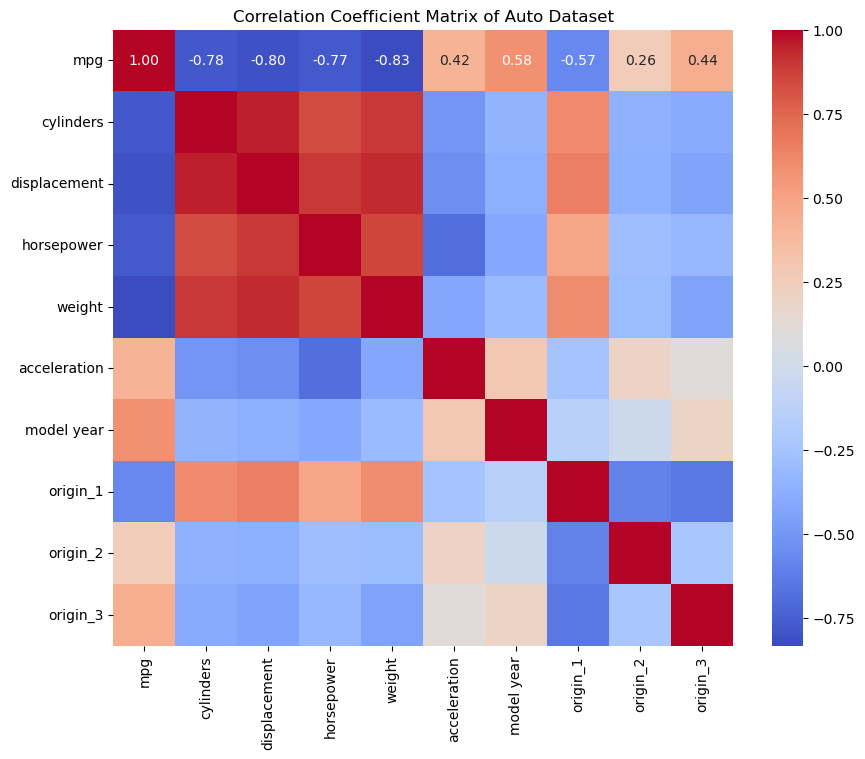

mpg             1.000000
model year      0.579267
origin_3        0.442174
acceleration    0.420289
origin_2        0.259022
origin_1       -0.568192
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

In [19]:
# calc correlation matrix

corr_matrix = auto_df.corr()

# plot the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Coefficient Matrix of Auto Dataset')
plt.show()

# highlight correlations of 'mpg' with other features

corr_matrix['mpg'].sort_values(ascending=False)

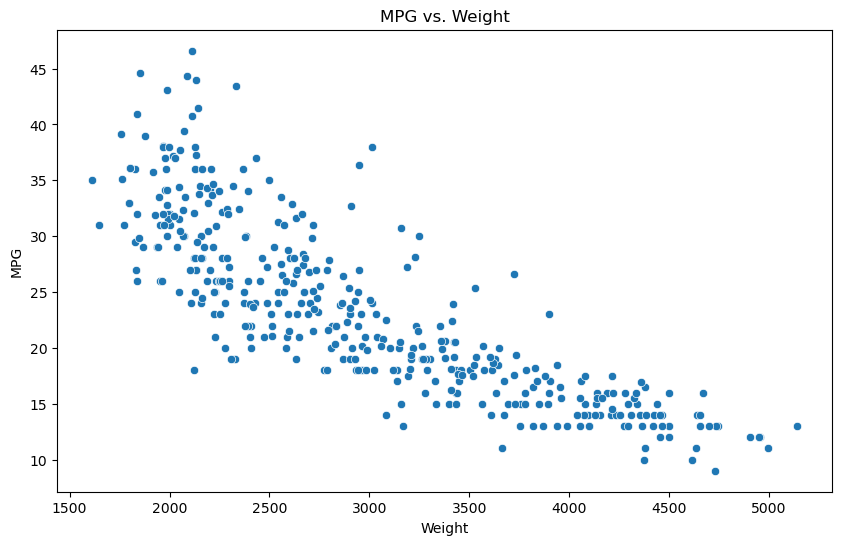

In [20]:
# plot mpg vs. weight

plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=auto_df)
plt.title('MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [21]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg

# define (X) and the (y)
X=auto_df.drop('mpg', axis=1)
y=auto_df['mpg']

# split the data into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# verify the sizes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((318, 9), (80, 9), (318,), (80,))

In [22]:
# Train an ordinary linear regression on the training data

# initialize the Linear Regression model
lr_model=LinearRegression()

# train the model on the training data
lr_model.fit(X_train, y_train)

# predict the mpg values on the training data
y_train_pred=lr_model.predict(X_train)

# evaluate the model on the training data
train_mse=mean_squared_error(y_train, y_train_pred)
train_r2=r2_score(y_train, y_train_pred)

(train_mse, train_r2)

(11.358743895785453, 0.8188288951042786)

In [27]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results

# predict the mpg values on the test data
y_test_pred = lr_model.predict(X_test)

# evaluate the model on the test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# calc RMSE for the training set
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

(train_rmse, train_mae, train_r2, test_rmse, test_mae, test_r2)

(3.370273563938906,
 2.6054846937710354,
 0.8188288951042786,
 2.8877573478836305,
 2.287586770442106,
 0.8449006123776617)

Interpretation:

R2: The model explains approximately 82% of the variance in the training set and 84% in the test set. The fact that the R2 on the test set is slightly higher than on the training set indicates the model generalizes well and is not overfitting.
RMSE and MAE: These metrics measure the average magnitude of the errors between the predicted and actual values, with RMSE giving more weight to larger errors due to the squaring of the errors. The lower values of RMSE and MAE on the test set compared to the training set further confirm the model's ability to generalize well for unseen data. Specifically, the RMSE values suggest that on average, the model's predictions deviate from the actual values by about 3.37 mpg on the training set and 2.89 mpg on the test set. The MAE provides a similar interpretation but is less sensitive to large errors, showing an average absolute deviation of around 2.61 mpg on the training set and 2.29 mpg on the test set.
Overall, the Ordinary Linear Regression model performs robustly, with good predictive accuracy and generalization capability to unseen data. The close performance metrics between the training and test sets suggest that the model is well-calibrated and not overfitting the training data.

In [29]:
# Pick another regression model and repeat the previous two steps
# import library

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [34]:
# random forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf_model.fit(X_train, y_train)

# predict the mpg values on the training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


# the training set
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# the test set
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

(train_mse_rf,train_rmse_rf,train_mae_rf,train_r2_rf,test_mse_rf,test_rmse_rf,test_mae_rf,test_r2_rf)

(1.2023124182389944,
 1.096500076716365,
 0.7471289308176098,
 0.9808232079849052,
 4.5955675000000005,
 2.1437274780158044,
 1.5959750000000006,
 0.9145272184753711)

Interpretation:

Training Performance:

The MSE and RMSE indicate low error values, showing that the model's predictions are close to the actual training data values. An RMSE of 1.097 suggests the predictions are generally within 1.097 mpg of the actual values.
The MAE of 0.747 means that, on average, the model's predictions deviate from the actual values by less than 1 mpg, which is good.
An R2 of 0.981 is exceptionally high, suggesting the model explains 98.1% of the variance in the training data's mpg. This indicates a very close fit to the training data.

Test Performance:

The test MSE of 4.596 and RMSE of 2.144 indicate that the model's predictions on the test set are, on average, within 2.144 mpg of the actual values, which is reasonable but shows a decrease in accuracy compared to the training set. The higher test MSE compared to the training MSE suggests that the model faces more challenges when predicting unseen data, which is expected to some extent.
The MAE of 1.596 on the test set further reflects the model's prediction accuracy, with average errors of about 1.6 mpg.
The R2 value of 0.915 on the test set is still very high, indicating the model explains a significant portion (91.5%) of the variance in the test data's mpg. This suggests that despite the prediction errors, the model performs well in capturing the underlying trend.